In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier


In [2]:
df = pd.read_csv('dataset.csv')
# Filter
df = df.loc[~df['Activity'].isin(['LIE_TO_STAND', 'STAND_TO_LIE'])]

X = df.drop(columns=['Activity'])
y = df['Activity']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

In [3]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

## MLP

In [4]:
mpl = MLPClassifier(activation = 'logistic',
                solver='adam',
                alpha=1e-5,
                learning_rate = 'invscaling',
                max_iter = 500,
                hidden_layer_sizes=(100,),
                random_state=42)

result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                        return_train_score=True, n_jobs=-1)
print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

print("\tf1:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_f1_weighted').mean()*100,
            std = result.get('test_f1_weighted').std()))

print("\tbalanced accuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_balanced_accuracy').mean()*100,
            std = result.get('test_balanced_accuracy').std()))

print("\taccuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
      .format(mean = result.get('test_accuracy').mean()*100,
              std = result.get('test_accuracy').std()))

# best hidden layer size: 100

Hidden Layers = 100:
	f1:
		mean = 96.37%;
		std = 0.02;
	balanced accuracy:
		mean = 95.99%;
		std = 0.02;
	accuracy:
		mean = 96.39%;
		std = 0.02;


## MLP Report

In [5]:
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(100,),
                    random_state=42)

acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 96.39%;	std = 0.02;
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1958
        LIE_TO_SIT       1.00      0.99      0.99        85
           SITTING       0.94      0.94      0.94      1801
        SIT_TO_LIE       0.98      0.98      0.98       107
      SIT_TO_STAND       0.89      1.00      0.94        33
          STANDING       0.95      0.94      0.95      1979
      STAND_TO_SIT       0.95      0.84      0.89        70
           WALKING       0.97      0.96      0.97      1722
WALKING_DOWNSTAIRS       0.98      0.98      0.98      1407
  WALKING_UPSTAIRS       0.95      0.97      0.96      1544

          accuracy                           0.96     10706
         macro avg       0.96      0.96      0.96     10706
      weighted avg       0.96      0.96      0.96     10706



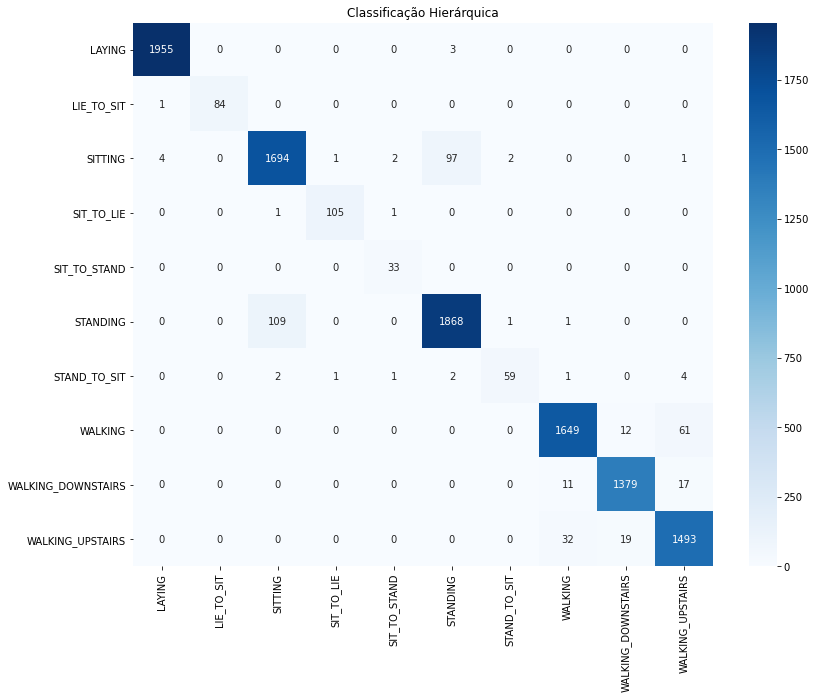

In [6]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)